In [1]:
import os
import shutil
import random
import PIL
import cv2

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
train_data="DL-datasets/Pneumonia X Ray/train"

In [4]:
test_data="DL-datasets/Pneumonia X Ray/test"

In [5]:
import pathlib
train_data=pathlib.Path(train_data)
test_data=pathlib.Path(test_data)

In [6]:
class_name = ['Pneumonia' , 'Normal']

In [7]:
normal_img = list(train_data.glob('NORMAL/*'))

In [8]:
normal_img

[WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0695-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0696-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0698-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0702-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0707-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0718-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0719-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0725-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0727-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0730-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0736-0001.jpeg'),
 WindowsPath('DL-datasets/Pneumonia X Ray/train/NORMAL/NORMAL2-IM-0741-0001.

In [9]:
len(normal_img)

250

In [10]:
pneumonia_img = list(train_data.glob('PNEUMONIA/*'))

In [12]:
len(pneumonia_img)

88

In [11]:
list1 = list(test_data.glob('PNEUMONIA/*'))

In [13]:
len(list1)

50

In [14]:
pneumonia_img = pneumonia_img+list1
len(pneumonia_img)

138

In [21]:
X = []
Y = []

for i in normal_img:
    
    img = cv2.imread(str(i))
        
    resized_img = cv2.resize(img,(180,180))
    
    X.append(resized_img)
    Y.append(1)

In [22]:
for i in pneumonia_img:
    
    img = cv2.imread(str(i))
        
    resized_img = cv2.resize(img,(180,180))
    
    X.append(resized_img)
    Y.append(0)

In [23]:
import numpy as np
X = np.array(X)
Y = np.array(Y)

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=0)

In [25]:
X_train.shape

(291, 180, 180, 3)

In [26]:
X_test.shape

(97, 180, 180, 3)

In [27]:
Y_train.shape

(291,)

In [28]:
X_train = X_train/255
X_test = X_test/255

In [29]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
     layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
     layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(101)
])

In [30]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
10/10 [==============================] - 5s 361ms/step - loss: 1.5308 - accuracy: 0.5326
Epoch 2/10
10/10 [==============================] - 4s 362ms/step - loss: 0.4969 - accuracy: 0.7491
Epoch 3/10
10/10 [==============================] - 4s 370ms/step - loss: 0.3087 - accuracy: 0.8660
Epoch 4/10
10/10 [==============================] - 4s 383ms/step - loss: 0.1818 - accuracy: 0.9244
Epoch 5/10
10/10 [==============================] - 4s 371ms/step - loss: 0.1036 - accuracy: 0.9622
Epoch 6/10
10/10 [==============================] - 4s 377ms/step - loss: 0.0539 - accuracy: 0.9931
Epoch 7/10
10/10 [==============================] - 4s 386ms/step - loss: 0.0385 - accuracy: 0.9863
Epoch 8/10
10/10 [==============================] - 4s 390ms/step - loss: 0.0221 - accuracy: 0.9931
Epoch 9/10
10/10 [==============================] - 4s 445ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 5s 457ms/step - loss: 0.0053 - accuracy: 1.0000

In [31]:
#Estimation model's performance

test_loss , test_acc = model.evaluate(X_test,Y_test)
print("Loss = ",test_loss)
print("Accuracy = ",test_acc)

4/4 [==============================] - 0s 66ms/step - loss: 0.1097 - accuracy: 0.9485
Loss =  0.1096753478050232
Accuracy =  0.9484536051750183


In [35]:
import random
n = random.randint(0,len(X_test))

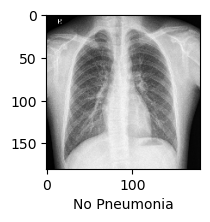

In [36]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[n])
plt.xlabel(class_name[Y_test[n]])
plt.show()

In [37]:
predict_model = model.predict(X_test)
print('predicted class ',class_name[np.argmax(predict_model[n])])

4/4 [==============================] - 0s 64ms/step
predicted class  No Pneumonia
